In [1]:
# hidden-but-run
import sys
sys.path.insert(0, "..")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def heatmap(matrix, annot=True, fmt=".0f", cmap="cividis", figsize=None, **kwargs):
    if figsize:
        plt.subplots(figsize=figsize)
    sns.heatmap(matrix, annot=annot, fmt=fmt, cmap=cmap, **kwargs)

In [19]:
from elastipy import Search, query, connections
conn = connections.get()

In [3]:
INDEX = "elastipy-example-setiquest-irc" 

<AxesSubplot:xlabel='month'>

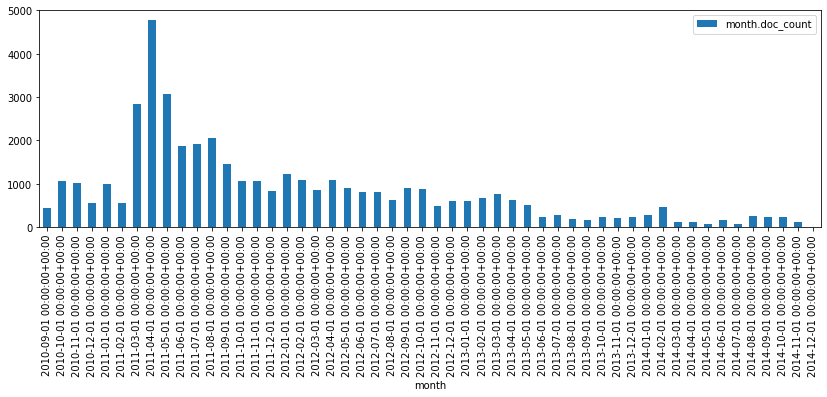

In [4]:
agg = Search(index=INDEX) \
    .agg_date_histogram("month", calendar_interval="month")
    
agg.execute().df(to_index="month").plot.bar(figsize=(14, 4))

<AxesSubplot:xlabel='month'>

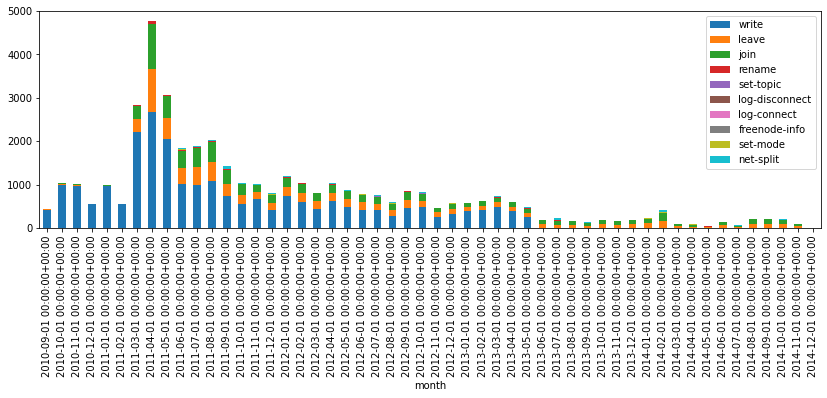

In [5]:
agg = Search(index=INDEX) \
    .agg_date_histogram("month", calendar_interval="month") \
    .agg_terms("event", field="event")
    
df = agg.execute().df(to_index="month", flat="event", exclude="*.doc_count")
df.plot.bar(figsize=(14, 4), stacked=True)

In [14]:
KEYWORDS = [
    "radio", "telescope", "meeting", "setiquest", 
    "form", "wiki", "community", "code", "project",
    "work", "help", "question", "alien", "ufo",
    "analysis", "source", "signal", "seti", "detect",
    "data", "thank"
]
agg = Search(index=INDEX) \
    .agg_filters("keyword", filters={
        key: query.QueryString(f"text: *{key}*")
        for key in KEYWORDS
    }) \
    .metric_cardinality("users", field="user")

agg.execute().dump.table(sort="-keyword.doc_count")

keyword   │ keyword.doc_count                            │ users                                     
──────────┼──────────────────────────────────────────────┼───────────────────────────────────────────
seti      │ 3388 ██████████████████████████████████████▉ │ 99 ██████████████████████████████████████▉
setiquest │ 1749 ████████████████████▋                   │ 72 ████████████████████████████▋          
work      │ 1026 ████████████▌                           │ 63 █████████████████████████▎             
wiki      │  812 ██████████                              │ 55 ██████████████████████                 
project   │  747 █████████▍                              │ 66 ██████████████████████████▍            
data      │  732 █████████▎                              │ 55 ██████████████████████                 
thank     │  539 ███████                                 │ 59 ███████████████████████▋               
meeting   │  491 ██████▌                                 │ 36 ██████████████▊     

<AxesSubplot:>

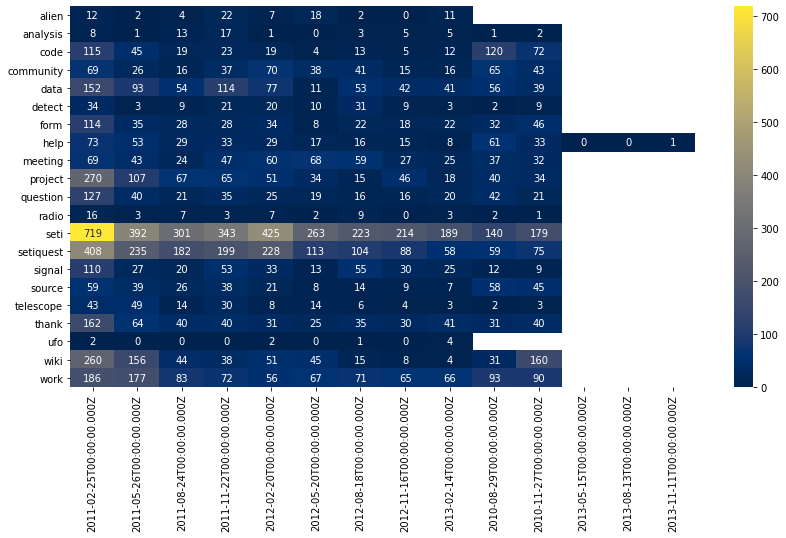

In [43]:
agg = Search(index=INDEX) \
    .agg_filters("keyword", filters={
        key: query.QueryString(f"text: *{key}*")
        for key in KEYWORDS
    }) \
    .agg_date_histogram("year", fixed_interval="90d", min_doc_count=0) \
    .metric_cardinality("users", field="user")

plt.subplots(figsize=(14, 7))
sns.heatmap(agg.execute().df_matrix(), annot=True, fmt=".0f", cmap="cividis")

In [8]:
s = Search(index=INDEX).match("text", "code")
print(list(s.agg_significant_terms(field="text", size=100).execute().keys()))

['code', 'release', 'summer', 'source', 'google', 'released', 'gpl', 'backendserver', 'sonata', 'documented', 'documentation', 'decoding', 'qr', 'gsoc', 'documenting', 'contributed', 'commented', 'license', 'radians', 'modularization', 'i', 'under', 'open', 'base', 'releasing', 'contributions', 'someone', 'development', 'aspects', 'github', 'doxygen', 'meta', 'contribution', 'quiz', 'snapshot', 'angle', 'we', 'through', 'without', 'understand', 'setiquest', 'write', 'separate', 'review', 'have', 'si', 'before', 'our', 'fftw', 'org', 'compatible', 'helping', 'lgpl', 'releases', 'can', 'need', 'so', 'use', 'out', 'fftss', 'sourcing', 'apache', 'itself', 'otherwise', 'all', 'document', 'require', 'buy', 'mit', 'sell', 'adding', 'process', 'do', 'commercial', 'some', 'licensed', 'from', 'than', 'think', 'library', 'topic', 'less', 'autocorrelation', 'palamida', 'detection', 't', 'help', 'effective', 'could', 'has']


In [13]:
s = Search(index=INDEX)#.query_string("text: *signal*")
s.agg_significant_terms(field="text", size=50).execute().dump.table(sort=-1)

a0        │ a0.doc_count                                
──────────┼─────────────────────────────────────────────
we        │ 2891 ███████████████████████████████████████
setiquest │ 1739 ███████████████████████▊               
org       │ 1238 █████████████████▎                     
http      │ 1099 ███████████████▌                       
about     │ 1067 ███████████████                        
seti      │  951 █████████████▌                         
would     │  865 ████████████▍                          
good      │  834 ███████████▉                           
ok        │  832 ███████████▉                           
like      │  801 ███████████▌                           
sigblips  │  787 ███████████▍                           
from      │  785 ███████████▍                           
how       │  763 ███████████                            
time      │  746 ██████████▊                            
forum     │  720 ██████████▌                            
wiki      │  710 ██████████▍   

In [10]:
Search(index=INDEX).execute().hits

{'total': {'value': 10000, 'relation': 'gte'},
 'max_score': 1.0,
 'hits': [{'_index': 'elastipy-example-setiquest-irc',
   '_type': '_doc',
   '_id': '20100928-0',
   '_score': 1.0,
   '_source': {'index': 0,
    'timestamp': '2010-09-28T10:59:00',
    'raw_line': 'avinash: Welcome everyone.',
    'user': 'avinash',
    'event': 'write',
    'text': 'Welcome everyone.',
    'timestamp_hour': 10,
    'timestamp_weekday': '2 Tuesday'}},
  {'_index': 'elastipy-example-setiquest-irc',
   '_type': '_doc',
   '_id': '20100928-1',
   '_score': 1.0,
   '_source': {'index': 1,
    'timestamp': '2010-09-28T11:00:00',
    'raw_line': 'avinash: We can start off with everyone saying one sentence about themselves.',
    'user': 'avinash',
    'event': 'write',
    'text': 'We can start off with everyone saying one sentence about themselves.',
    'timestamp_hour': 11,
    'timestamp_weekday': '2 Tuesday'}},
  {'_index': 'elastipy-example-setiquest-irc',
   '_type': '_doc',
   '_id': '20100928-2',
 

In [11]:
conn.termvectors(
    index=INDEX, 
    id="20100928-3",
    term_statistics=True,
    field_statistics=True,
)

{'_index': 'elastipy-example-setiquest-irc',
 '_type': '_doc',
 '_id': '20100928-3',
 '_version': 1,
 'found': True,
 'took': 0,
 'term_vectors': {'text': {'field_statistics': {'sum_doc_freq': 188900,
    'doc_count': 24228,
    'sum_ttf': 198292},
   'terms': {'activities': {'doc_freq': 9,
     'ttf': 9,
     'term_freq': 1,
     'tokens': [{'position': 15, 'start_offset': 81, 'end_offset': 91}]},
    'am': {'doc_freq': 665,
     'ttf': 692,
     'term_freq': 1,
     'tokens': [{'position': 9, 'start_offset': 40, 'end_offset': 42}]},
    'avinash': {'doc_freq': 328,
     'ttf': 330,
     'term_freq': 1,
     'tokens': [{'position': 6, 'start_offset': 26, 'end_offset': 33}]},
    'co': {'doc_freq': 32,
     'ttf': 32,
     'term_freq': 1,
     'tokens': [{'position': 12, 'start_offset': 59, 'end_offset': 61}]},
    'i': {'doc_freq': 6571,
     'ttf': 8218,
     'term_freq': 2,
     'tokens': [{'position': 0, 'start_offset': 0, 'end_offset': 1},
      {'position': 8, 'start_offset': 38,